# This is for the analysis of the results from the droplet segmentation (Droplets_detection.ipynb)

## 1. Import all libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from scipy.stats import ranksums
from scipy.stats import median_test


## 2. Redefining default plot settings

In [4]:
import matplotlib as mpl 
new_rc_params = {'text.usetex': False, 
"svg.fonttype": 'none',
'font.size': 7,
"lines.linewidth" : 0.5,
"figure.figsize": (2,2),
"lines.markersize":4,
                 
"xtick.labelsize": 7,  
"ytick.labelsize": 7,   
"ytick.major.size": 5,
"xtick.major.size": 5,
"ytick.major.width": 1.1,
"xtick.major.width": 1.1,
"xtick.top" : False,
'xtick.minor.visible': True,   # visibility of minor ticks on x-axis
'ytick.minor.visible': True,
'xtick.minor.size': 3,   # visibility of minor ticks on x-axis
'ytick.minor.size': 3,
"ytick.minor.width": 1.1,
"xtick.minor.width": 1.1,
} 
mpl.rcParams.update(new_rc_params) 
image_format = "svg"

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

sns.set_style({'ytick.right': True, 'xtick.top': True })


In [ ]:
# if you want to change the colors
from cycler import cycler

# Set the default color cycle
colors=plt.cm.viridis_r(np.linspace(0,12,2))
#colors=plt.cm.seismic_r(np.linspace(0,20,2))

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
image_format = "svg"
red = mcp.gen_color(cmap="seismic_r",n=4)[1]
green = mcp.gen_color(cmap="viridis_r",n=4)[1]
red = '#e51818ff'
green = '#13b0b3ff'

## 3. Define plotting functions

### Now loading the CSVs

In [ ]:
#1 Load the CSV
c = ['M+TOP', 'Main band', 'M+L1', 'M+L1+TOP', 'TOP alone',
       'PCR no reverse primer']
c = ["DrWa no PCR", "DrWa PCR", "Raw template", "DrB4KLA PCR"]
dB = pd.read_csv('/Users/***/output_DrB4KLA_newoverlay.csv')
dA = pd.read_csv('/Users/***/output_DrWa_newoverlay_21_01.csv')

dMUTA = pd.read_csv('/Users/***/output_DrB4KLA_muta_newoverlay.csv')
dt = pd.concat([dA, dB], ignore_index=True)
dt = pd.concat([dt, dMUTA], ignore_index=True)

# Store pixel area: 
#2 Calculate pixel size in um square
dt['pixel area'] = dt['pixel size']*dt['pixel size']
#2 Calculate pixel size in um square

#3 Convert all measured areas to their values in um

m_len = ["axis_minor_length", "axis_major_length", "perimeter"]
for col in m_len:
        dt[col] = dt[col]*dt["pixel size"]
    
m_areas = ["area", "area_filled", "hollow area"]
for col in m_areas :
    print(col)
    dt[col] = dt[col]*dt["pixel area"]

# We filter out droplets with a radius below 3 um: 
print(len(dt))
#dt = dt[dt.area_filled > 9*math.pi]
print(len(dt))

dt["circularity"] = (4 * math.pi * dt.area_filled.values) / (np.power(dt.perimeter.values, 2) )
dt["radius"] = np.sqrt(dt.area_filled.values/math.pi)
dt["% hollow area"] = dt["hollow area"]/dt["area_filled"]

# Only keeping the 48h timepoint
dt = dt[dt.time == 48]
dt.condition.unique()


area
area_filled
hollow area
39213
39213


array(['DrWa no PCR', 'M+TOP', 'Main band', 'PCR no reverse primer',
       'DrWa PCR', 'M+L1', 'M+L1+TOP', 'TOP alone', 'DrB4KLA M puri',
       'DrB4KLA PCR', 'DrB4KLA raw template', '5X TAQ', '20X TAQ',
       '10X TAQ', '5X JB HM'], dtype=object)

# Figure 1 (quantification and statistical analysis)

In [29]:
# tesing for significance

# for a difference in %of hollow area
print("for a difference in %of hollow area")
sample1 = df[df.condition == 'DrWa no PCR']["% hollow area"]
sample2 = df[df.condition == 'DrWa PCR']["% hollow area"]
stat, p, med, tbl = median_test(sample1, sample2)
print("according to the median test this is the p-value between group 1 and group 2 :"+ str(p))

# For a difference in total area

print("for a difference in total area")
sample1 = df[df.condition == 'DrWa no PCR'].area_filled
sample2 = df[df.condition == 'DrWa PCR'].area_filled
stat, p, med, tbl = median_test(sample1, sample2)
print("according to the median test this is the p-value between group 1 and group 2 :"+ str(p))

#ranksums(sample1, sample2, alternative='less')
#ranksums(sample1, sample2, alternative='greater')

for a difference in %of hollow area
according to the median test this is the p-value between group 1 and group 2 :1.761028876960511e-38
for a difference in total area
according to the median test this is the p-value between group 1 and group 2 :6.0892235700993834e-24


## Quantifying the percentage of vacuolated droplets

In [27]:
# threshold "hollowness"

df = dt
df["radius"] = np.sqrt(df["area_filled"]/np.pi)

#df = df[df["area_filled"] > 1000]
df = df[df["radius"] > 25]


df["hollow_binary"] = (1*(df["% hollow area"] > 0.05))* (1*(df["hollow area"] > 5))
#df = df[df["hollow area"] > 0.5]

print(df.groupby(["condition"])["hollow_binary"].mean())

print(df.groupby(["condition"])["hollow_binary"].count())

#print(df.groupby(["condition", "replicate"])["hollow_binary"].std())

condition
10X TAQ                  0.987952
20X TAQ                  1.000000
5X JB HM                 0.796178
5X TAQ                   0.972414
DrB4KLA M puri           0.012195
DrB4KLA PCR              0.012594
DrB4KLA raw template     0.014458
DrWa PCR                 0.942675
DrWa no PCR              0.000000
M+L1                     0.509434
M+L1+TOP                 0.841584
M+TOP                    0.805643
Main band                0.006993
PCR no reverse primer    1.000000
TOP alone                0.995000
Name: hollow_binary, dtype: float64
condition
10X TAQ                   83
20X TAQ                  135
5X JB HM                 157
5X TAQ                   145
DrB4KLA M puri           246
DrB4KLA PCR              397
DrB4KLA raw template     415
DrWa PCR                 157
DrWa no PCR              104
M+L1                     159
M+L1+TOP                 101
M+TOP                    319
Main band                286
PCR no reverse primer     30
TOP alone                200

/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_1923/1503325523.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hollow_binary"] = (1*(df["% hollow area"] > 0.05))* (1*(df["hollow area"] > 5))


35


/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_10366/637934244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["radius"] = np.sqrt(df["area_filled"]/np.pi)
/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_10366/637934244.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Mut1', 'WT1'])


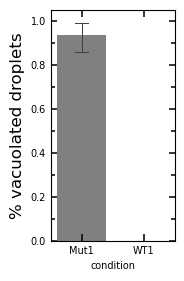

In [67]:
# For plotting the violinplots based on the mean value per FOV
c = ["DrWa no PCR", "DrWa PCR"]
df = dt[dt.condition.isin(c)]
df["radius"] = np.sqrt(df["area_filled"]/np.pi)

df = df[df["radius"] > 15]
df = df[df["radius"] > 25]

# Threshold to make sure that the %of hollow area is at least 5um2 and at least 5% of the total area 
# (else small mistakes in detection, show up as false positives)
df["hollow_binary"] = (1*(df["% hollow area"] > 0.05))* (1*(df["hollow area"] > 5))


# Sorting to make sure things are in the correct order
df["sorter"] = df.condition
df = df.set_index('sorter')
df = df.loc[c]


# Changing the minor tick parameters because the plot is hoizontal instead of vertical

mpl.rcParams['ytick.minor.visible'] = False
mpl.rcParams['xtick.minor.visible'] = False
mpl.rcParams["figure.figsize"]= (1.6,3.0)


data = pd.DataFrame(df.groupby(['condition','image_ID'])["hollow_binary"].mean())
print(len(data))
g = sns.barplot(data, x = "condition", y = "hollow_binary", color='gray', capsize=.2)#, “count”, “width”})
g.set_xticklabels(['Mut1', 'WT1'])
g.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(None)
plt.ylabel('% vacuolated droplets', fontsize = 12)
plt.ylim([0.0, 1.05])
plt.savefig("Supl_figure_%hollowdroplets_Mut1_treshold_25_radius.svg", format = "svg", dpi = 1200)


40


/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_10366/1530334561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["radius"] = np.sqrt(df["area_filled"]/np.pi)
/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_10366/1530334561.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Mut1', 'WT1', 'no rev primer'])


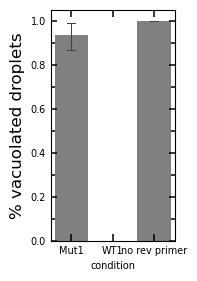

In [95]:
# For plotting the violinplots based on the mean value per FOV
c = ["DrWa no PCR", "DrWa PCR", 'PCR no reverse primer']
df = dt[dt.condition.isin(c)]
df["radius"] = np.sqrt(df["area_filled"]/np.pi)

df = df[df["radius"] > 15]
df = df[df["radius"] > 25]

# Threshold to make sure that the %of hollow area is at least 5um2 and at least 5% of the total area 
# (else small mistakes in detection, show up as false positives)
df["hollow_binary"] = (1*(df["% hollow area"] > 0.05))* (1*(df["hollow area"] > 5))


# Sorting to make sure things are in the correct order
df["sorter"] = df.condition
df = df.set_index('sorter')
df = df.loc[c]


# Changing the minor tick parameters because the plot is hoizontal instead of vertical

mpl.rcParams['ytick.minor.visible'] = False
mpl.rcParams['xtick.minor.visible'] = False
mpl.rcParams["figure.figsize"]= (1.6,3.0)


data = pd.DataFrame(df.groupby(['condition','image_ID'])["hollow_binary"].mean())
print(len(data))
g = sns.barplot(data, x = "condition", y = "hollow_binary", color='gray', capsize=.2)#, “count”, “width”})
g.set_xticklabels(['Mut1', 'WT1', 'no rev primer'])
g.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(None)
plt.ylabel('% vacuolated droplets', fontsize = 12)
plt.ylim([0.0, 1.05])
plt.savefig("Supl_figure_%hollowdroplets_Mut1_treshold_25_radius_PCR_no_rev.svg", format = "svg", dpi = 1200)


41


/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_10366/2103828637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area_filled"] = df["area_filled"]*0.001
/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_10366/2103828637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sorter"] = df.condition


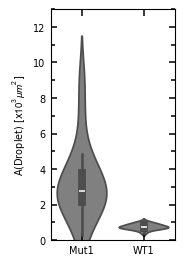

In [83]:
# For plotting the violinplots based on the mean value per FOV
c = ["DrWa no PCR", "DrWa PCR"]

df = dt[dt.condition.isin(c)]
df["area_filled"] = df["area_filled"]*0.001

# Sorting to make sure things are in the correct order
df["sorter"] = df.condition
df = df.set_index('sorter')
df = df.loc[c]

# Colours for every condition
cM = "#84206bff"
cML= "#e55c30ff"
cMS= "#f6d746ff"
# Changing the minor tick parameters because the plot is hoizontal instead of vertical

mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.minor.visible'] = False
mpl.rcParams["figure.figsize"]= (1.6,3.0)


data = pd.DataFrame(df.groupby(['condition','image_ID'])["area_filled"].mean())
print(len(data))
g = sns.violinplot(data, x = "condition", y = "area_filled", density_norm = "width", color = "gray")#, “count”, “width”})
#g.set_yticklabels(['M+S', 'M+L','M'])
g.yaxis.set_minor_locator(plt.MultipleLocator(1))

plt.ylabel(None)
plt.xlabel(None)
plt.ylabel(r'$\frac{A(Vacuole)}{A(Droplet)}$', fontsize = 7)
plt.xticks([0,1],["Mut1", "WT1"])
plt.ylabel("A(Droplet) [x$10^3 μm^2$]")
plt.ylim([0, 13])
plt.savefig("figureSupl_1_mean_area_FOV.svg", format = "svg", dpi = 1200)


# Figure 2 (quantification and statistical analysis)

/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_1923/3057116046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sorter"] = df.condition


43


/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_1923/3057116046.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data, y = "condition", x = "% hollow area", density_norm = "width", palette = [cM,cML,cMS], alpha = 1)#, “count”, “width”})
/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_1923/3057116046.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(['M+S', 'M+L','M'])


(-0.01, 0.22)

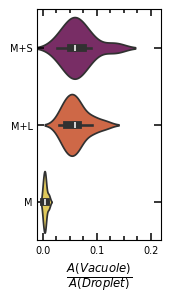

In [15]:
# For plotting the violinplots based on the mean value per FOV
c = ['Main band', 'M+TOP','M+L1']

df = dt[dt.condition.isin(c)]
#df = df[df["area_filled"] > 1000]

# Sorting to make sure things are in the correct order
df["sorter"] = df.condition
df = df.set_index('sorter')
df = df.loc[c]

# Colours for every condition
cM = "#84206bff"
cML= "#e55c30ff"
cMS= "#f6d746ff"
# Changing the minor tick parameters because the plot is hoizontal instead of vertical

mpl.rcParams['ytick.minor.visible'] = False
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams["figure.figsize"]= (1.6,3.0)


data = pd.DataFrame(df.groupby(['condition','image_ID'])["% hollow area"].mean())
print(len(data))
g = sns.violinplot(data, y = "condition", x = "% hollow area", density_norm = "width", palette = [cM,cML,cMS], alpha = 1)#, “count”, “width”})
g.set_yticklabels(['M+S', 'M+L','M'])
g.xaxis.set_minor_locator(plt.MultipleLocator(0.025))

plt.ylabel(None)
plt.xlabel(r'$\frac{A(Vacuole)}{A(Droplet)}$', fontsize = 12)
plt.xlim([-0.01, 0.22])
#plt.savefig("figure2_mean_FOV.svg", format = "svg", dpi = 1200)


### Testing for significance

In [24]:
from scipy.stats import median_test

sample1 = M_Shorter = data[0:10].values.flatten()

sample2 = M_Longer = data[11:25].values.flatten()

sample3 = M = data[26:].values.flatten()


print(np.median(sample1), np.median(sample2), np.median(sample3))
print(ranksums(sample3, sample1))
print(ranksums(sample3, sample2))


stat, p, med, tbl = median_test(sample3, sample1)
print("according to the median test this is the p-value between group 1 and group 2 :"+ str(p))

stat, p, med, tbl = median_test(sample3, sample2)
print("according to the median test this is the p-value between group 1 and group 3 :"+ str (p))


0.0603098287320815 0.05872574448043754 0.0038782753091540054
RanksumsResult(statistic=-4.267819784654187, pvalue=1.973926892023982e-05)
RanksumsResult(statistic=-4.723610906922796, pvalue=2.316935104346046e-06)
according to the median test this is the p-value between group 1 and group 2 :0.0001862980237471227
according to the median test this is the p-value between group 1 and group 3 :1.190114825336316e-06


# Figure 3 (quantification and statistical analysis)

76


/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_1923/876039458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["radius"] = np.sqrt(df["area_filled"]/np.pi)
/var/folders/9z/200xn02d4qg4f0433g7nw2580000gp/T/ipykernel_1923/876039458.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Mn-muta', 'dPTP', 'WT2'])


(0.0, 1.05)

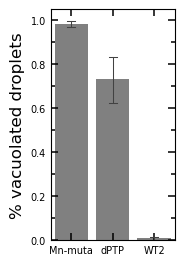

In [26]:
# For plotting the violinplots based on the mean value per FOV
c = ['DrB4KLA PCR', '20X TAQ', '5X JB HM']
df = dt[dt.condition.isin(c)]
df["radius"] = np.sqrt(df["area_filled"]/np.pi)

df = df[df["radius"] > 15]
#df = df[df["radius"] > 25]

# Threshold to make sure that the %of hollow area is at least 5um2 and at least 5% of the total area 
# (else small mistakes in detection, show up as false positives)
df["hollow_binary"] = (1*(df["% hollow area"] > 0.05))* (1*(df["hollow area"] > 5))


# Sorting to make sure things are in the correct order
df["sorter"] = df.condition
df = df.set_index('sorter')
df = df.loc[c]


# Changing the minor tick parameters because the plot is hoizontal instead of vertical

mpl.rcParams['ytick.minor.visible'] = False
mpl.rcParams['xtick.minor.visible'] = False
mpl.rcParams["figure.figsize"]= (1.6,3.0)


data = pd.DataFrame(df.groupby(['condition','image_ID'])["hollow_binary"].mean())
print(len(data))
g = sns.barplot(data, x = "condition", y = "hollow_binary", color='gray', capsize=.2)#, “count”, “width”})
g.set_xticklabels(['Mn-muta', 'dPTP', 'WT2'])
g.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.xlabel(None)

plt.ylabel('% vacuolated droplets', fontsize = 12)
plt.ylim([0.0, 1.05])
#plt.savefig("Supl_figure_%hollowdroplets_mutaTAQ_dPTP_WT2.svg", format = "svg", dpi = 1200)

# Analysis of the timelapses (Figure 1)

## 1. Re-define defaukt plotting parameters

In [ ]:
mpl.rcParams['svg.fonttype'] = 'none'
# Set math text font to match Arial
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'  # Roman font for regular math text
mpl.rcParams['mathtext.it'] = 'Arial:italic'  # Italic font for variables
mpl.rcParams['mathtext.bf'] = 'Arial:bold'  # Bold font for bold math text


new_rc_params = {'text.usetex': False, 
"svg.fonttype": 'none',
'font.size': 7,
"lines.linewidth" : 0.5,
"figure.figsize": (2,2),
"lines.markersize":4,
                 
"xtick.labelsize": 7,  
"ytick.labelsize": 7,   
"ytick.major.size": 5,
"xtick.major.size": 5,
"ytick.major.width": 1.1,
"xtick.major.width": 1.1,
"xtick.top" : True,
'xtick.minor.visible': True,   # visibility of minor ticks on x-axis
'ytick.minor.visible': True,
'xtick.minor.size': 3,   # visibility of minor ticks on x-axis
'ytick.minor.size': 3,
"ytick.minor.width": 1.1,
"xtick.minor.width": 1.1,
} 
mpl.rcParams.update(new_rc_params) 
image_format = "svg"


## 2. Loading the dataset

In [ ]:
# Load the CSV of the timelapse


dT = pd.read_csv("/Users/****/output_timelapse_noPCR_21_01_24.csv")
dT = pd.concat([dT, pd.read_csv('/Users/****/output_timelapse_21_01_24.csv')], ignore_index=True)
dT = pd.concat([dT, pd.read_csv("/Users/****/output_timelapse_2.csv")], ignore_index=True)
dT = pd.concat([dT, pd.read_csv("/Users/****/output_timelapse_0.csv")], ignore_index = True)

dT.loc[dT.condition == "Wa no PCR","condition"] = "DrWa no PCR"
dT.loc[dT.condition == "Wa PCR","condition"] = "DrWa PCR"

# Store pixel size: 
dT['pixel area'] = dT['pixel size']*dT['pixel size']
#2 Calculate pixel size in um square

#3 Convert all measured areas to their values in um

m_len = ["axis_minor_length", "axis_major_length", "perimeter"]
for col in m_len:
        dT[col] = dT[col]*dT["pixel size"]
    
m_areas = ["area", "area_filled", "hollow area"]
for col in m_areas :
    print(col)
    dT[col] = dT[col]*dT["pixel area"]

dT.columns

area
area_filled
hollow area


Index(['Unnamed: 0', 'label', 'area', 'perimeter', 'axis_major_length',
       'axis_minor_length', 'intensity_mean', 'area_filled', 'full area',
       'hollow area', 'area ratios', 'pixel size', 'time', 'frame',
       'condition', 'image_ID', 'field', 'pixel area'],
      dtype='object')

In [20]:
# Formatting of the data
# Initialize the "timepoint" column to 0
dT["timepoint"] = 0

# Update "timepoint" for rows where "time" depending on their acquisition

# This is for the first replicate
dT.loc[dT.time == "Part 0","frame"] = dT.loc[dT.time == 'Part 0', "frame"].astype(int) -1

dT.loc[dT.time == "Part 0","timepoint"] = dT.loc[dT.time == 'Part 0', "frame"].astype(int) * 20 
dT.loc[dT.time == "Part 1","timepoint"] = dT.loc[dT.time == 'Part 1', "frame"].astype(int) * 20 + 560
dT.loc[dT.time == "Part 2", "timepoint"] = dT.loc[dT.time == 'Part 2', "frame"].astype(int) * 20 + 1160
dT.loc[dT.time == "Part 3", "timepoint"] = dT.loc[dT.time == "Part 3", "frame"].astype(int) * 20 + 2580

# Update "timepoint" for rows where "time" is "first 30 minutes", this is for the second replicate
dT.loc[dT.time == "Part 1 (overnight)", "timepoint"] = dT.loc[dT.time == 'Part 1 (overnight)', "frame"].astype(int) * 20 
dT.loc[dT.time == "Part 2 (12-36 hours)", "timepoint"] = dT.loc[dT.time == 'Part 2 (12-36 hours)', "frame"].astype(int) * 20 + 980 
dT.loc[dT.time == "Part 3 (36-60 hours)", "timepoint"] = dT.loc[dT.time == "Part 3 (36-60 hours)", "frame"].astype(int) * 20 + 1480 + 980 

dT["timepoint"] = dT["timepoint"]/60

dT = dT[dT.timepoint < 49.33]

### Quick check that the data was loaded correctly

In [21]:
#dT.groupby(["time"]).timepoint.min()
dT.groupby(["time"]).timepoint.max()

time
Part 0                   9.000000
Part 1                  19.000000
Part 1 (overnight)      16.000000
Part 2                  42.666667
Part 2 (12-36 hours)    40.666667
Part 3                  49.000000
Part 3 (36-60 hours)    49.000000
Name: timepoint, dtype: float64

## 3. Functions used for the analysis of the timelapse

In [994]:
import matplotlib.pyplot as plt
import numpy as np

def line_plot_with_error_dual_y(x1, y1, error1, x2, y2, error2, hue1=None, hue2=None, line_colors1=None, line_colors2=None, fill_alpha=0.2, xlabel="X-axis", ylabel1="Y1-axis", ylabel2="Y2-axis", title="Dual Y-Axis Line Plot with Error Regions", filename=None):
    """
    Plots two graphs sharing the x-axis but with different y-axes on the left and right, including continuous error regions with different line styles and colors.

    Parameters:
        x1, x2 (array-like or dict): X-axis values for the left and right y-axes plots, respectively.
        y1, y2 (array-like or dict): Y-axis values for the left and right y-axes plots, respectively.
        error1, error2 (array-like or dict): Error values (±) for the left and right y-axes plots, respectively.
        hue1, hue2 (list, optional): List of hue levels for the left and right y-axes plots. Default is None.
        line_colors1, line_colors2 (list, optional): List of colors for the left and right y-axes plots. Default is None.
        fill_alpha (float): Transparency level of the shaded regions. Default is 0.2.
        xlabel (str): Label for the x-axis. Default is "X-axis".
        ylabel1 (str): Label for the left y-axis. Default is "Y1-axis".
        ylabel2 (str): Label for the right y-axis. Default is "Y2-axis".
        title (str): Title of the plot. Default is "Dual Y-Axis Line Plot with Error Regions".
        filename (str, optional): File path to save the plot as an SVG. Default is None.

    Returns:
        None: Displays the plot.
    """
    fig, ax1 = plt.subplots(figsize=(6.17, 2.123))

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Define line styles
    line_styles1 = ["-", "--"]#, "-.", ":"]
    line_styles2 = ["-", "--"]#, ":", "-"]

    # Plot for the left y-axis
    if isinstance(y1, dict) and hue1 is not None:
        if line_colors1 is None:
            line_colors1 = plt.cm.tab10.colors

        for i, level in enumerate(hue1):
            color = line_colors1[i % len(line_colors1)]
            linestyle = line_styles1[i % len(line_styles1)]
            y_upper = y1[level] + error1[level]
            y_lower = y1[level] - error1[level]

            ax1.plot(x1[level], y1[level], label=level, color=color, linestyle=linestyle)
            ax1.fill_between(x1[level], y_lower, y_upper, color=color, alpha=fill_alpha)
    else:
        y_upper = y1 + error1
        y_lower = y1 - error1
        ax1.plot(x1, y1, label="Left Y1", color=line_colors1[0] if line_colors1 else "blue", linestyle=line_styles1[0])
        ax1.fill_between(x1, y_lower, y_upper, color=line_colors1[0] if line_colors1 else "blue", alpha=fill_alpha)

    # Plot for the right y-axis
    if isinstance(y2, dict) and hue2 is not None:
        if line_colors2 is None:
            line_colors2 = plt.cm.tab10.colors

        for i, level in enumerate(hue2):
            color = line_colors2[i % len(line_colors2)]
            linestyle = line_styles2[i % len(line_styles2)]
            y_upper = y2[level] + error2[level]
            y_lower = y2[level] - error2[level]

            ax2.plot(x2[level], y2[level], label=level, color=color, linestyle=linestyle)
            ax2.fill_between(x2[level], y_lower, y_upper, color=color, alpha=fill_alpha)
    else:
        y_upper = y2 + error2
        y_lower = y2 - error2
        ax2.plot(x2, y2, label="Right Y2", color=line_colors2[0] if line_colors2 else "red", linestyle=line_styles2[0])
        ax2.fill_between(x2, y_lower, y_upper, color=line_colors2[0] if line_colors2 else "red", alpha=fill_alpha)

    # Add labels and title

    ax1.yaxis.set_minor_locator(plt.MultipleLocator(100))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(5))

    ax1.set_ylabel(ylabel1)
    ax2.set_ylabel(ylabel2, fontsize = 12)
    
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1)
    ax2.set_ylabel(ylabel2, fontsize = 12)
    fig.suptitle(title)

    # Add legends
    ax1.legend(loc="upper left", fontsize=8)
    #ax2.legend(loc="upper right", fontsize=8)

    # Adjust layout and save if needed
    fig.tight_layout()
    if filename:
        plt.savefig(filename, format="svg", dpi=1200)

    plt.show()

# Example usage:
# x1 = {"Group 1": np.linspace(0, 10, 50), "Group 2": np.linspace(0, 10, 50)}
# y1 = {"Group 1": np.sin(x1["Group 1"]), "Group 2": np.cos(x1["Group 2"])}
# error1 = {"Group 1": 0.2 + 0.2 * np.sqrt(x1["Group 1"]), "Group 2": 0.1 + 0.1 * np.sqrt(x1["Group 2"])}
# x2 = {"Group 1": np.linspace(0, 10, 50), "Group 2": np.linspace(0, 10, 50)}
# y2 = {"Group 1": np.cos(x2["Group 1"]), "Group 2": np.sin(x2["Group 2"])}
# error2 = {"Group 1": 0.1 + 0.1 * np.sqrt(x2["Group 1"]), "Group 2": 0.2 + 0.2 * np.sqrt(x2["Group 2"])}
# line_plot_with_error_dual_y(x1, y1, error1, x2, y2, error2, hue1=["Group 1", "Group 2"], hue2=["Group 1", "Group 2"])


## 4. Actual plotting of the data

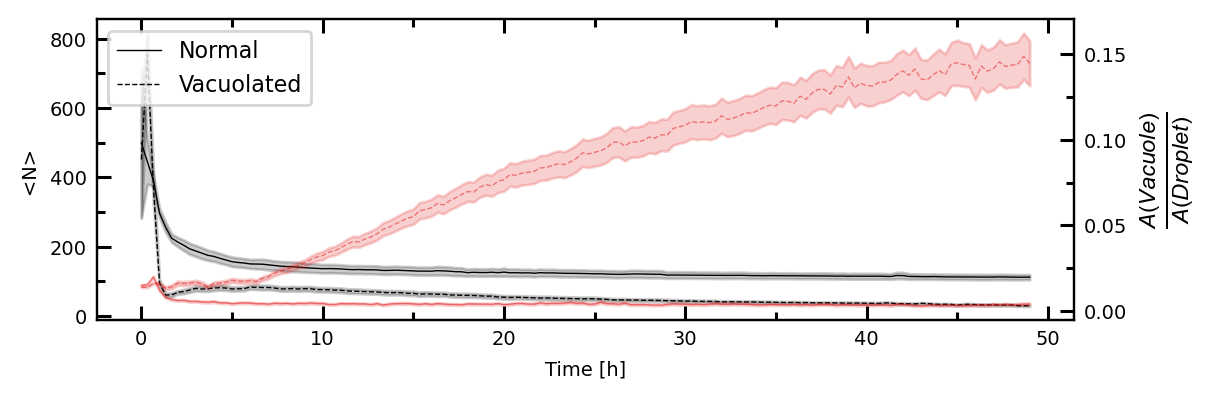

In [ ]:
dT1 = dT[dT.condition == 'DrWa no PCR']
sub1 = dT1.groupby(["timepoint", "image_ID"]).count().reset_index()[["timepoint", "image_ID", "label"]]
timepoints = np.array(sub1.timepoint.unique())
means1= sub1.groupby(["timepoint"])["label"].mean()
std_devs1 = sub1.groupby(["timepoint"])["label"].sem()

dT2 = dT[dT.condition == 'DrWa PCR']
sub2 = dT2.groupby(["timepoint", "image_ID"]).count().reset_index()[["timepoint", "image_ID", "label"]]
means2= sub2.groupby(["timepoint"])["label"].mean()
std_devs2 = sub2.groupby(["timepoint"])["label"].sem()
x1 = {"Normal": timepoints, "Vacuolated": timepoints}
y1 = {"Normal": means1, "Vacuolated": means2}
error1 = {"Normal": std_devs1, "Vacuolated": std_devs2}

mean_area1 = np.array(dT1.groupby(["timepoint"])[["area ratios"]].mean().values).flatten()
mean_area2 = np.array(dT2.groupby(["timepoint"])[["area ratios"]].mean().values).flatten()

std_devs1 = np.array(dT1.groupby(["timepoint"])[["area ratios"]].sem().values).flatten()
std_devs2 = np.array(dT2.groupby(["timepoint"])[["area ratios"]].sem().values).flatten()

y2 = {"Normal": mean_area1, "Vacuolated": mean_area2}
error2 = {"Normal": std_devs1, "Vacuolated": std_devs2}


line_plot_with_error_dual_y(x1, y1, error1, x1, y2, error2, hue1=["Normal", "Vacuolated"], hue2=["Normal", "Vacuolated"], 
                           line_colors1=['black','black'], line_colors2=[r,r] ,
                            ylabel1= "<N>",
                            ylabel2= r'$\frac{A(Vacuole)}{A(Droplet)}$',
                             xlabel="Time [h]"
                            , title="", filename="Combined_N_%hollowarea_time_test.svg")